# Libraries

In [81]:
import pandas as pd
import geopandas as gpd
import plotly.express as px
import shapely
import time

# Initialise Client API

Indicate the project used for making query

In [2]:
from google.cloud import bigquery
client = bigquery.Client(project="treenyc-384104") # mark the created project id

# Explore Public Datasets

In [74]:
with open("meta/public_ds.txt", 'w') as f:
    for ds in client.list_datasets(project='bigquery-public-data'):
        f.write(ds.dataset_id + ": " + str(client.get_dataset(ds.reference).description)[:100] + '\n')
    f.close()

In [114]:
def get_tables(dataset, client = client):
    """get table names and schema from given public dataset name"""
    for table in client.list_tables(f"bigquery-public-data.{dataset}"):
        table = client.get_table(table)
        print(table.full_table_id)
        print([item.name for item in table.schema])

    return

In [115]:
get_tables("geo_us_boundaries")

bigquery-public-data:geo_us_boundaries.adjacent_counties
['county', 'state', 'county_fips_code', 'neighbors', 'neighbors_state', 'neighbors_fips_code']
bigquery-public-data:geo_us_boundaries.adjacent_states
['state', 'state_name', 'state_fips_code', 'neighbors_state', 'neighbors_fips_code']
bigquery-public-data:geo_us_boundaries.cbsa
['geo_id', 'csa_geo_id', 'cbsa_fips_code', 'name', 'lsad_name', 'lsad_code', 'msa_indicator', 'mtfcc_feature_class_code', 'area_land_meters', 'area_water_meters', 'internal_point_latitude', 'internal_point_longitude', 'internal_point_geom', 'cbsa_geom']
bigquery-public-data:geo_us_boundaries.cnecta
['geo_id', 'cnecta_fips_code', 'name', 'name_lsad', 'lsad', 'mtfcc_feature_class_code', 'area_land_meters', 'area_water_meters', 'int_point_lat', 'int_point_lon', 'cnecta_geom']
bigquery-public-data:geo_us_boundaries.coastline
['name', 'coastline_geom']
bigquery-public-data:geo_us_boundaries.congress_district_115
['geo_id', 'state_fips_code', 'district_fips_code

# New York Road

In [184]:
query_geo = """
select full_name, road_geom, road_id
from `bigquery-public-data.geo_us_roads.all_roads_36`
limit 10000
"""
df_geo = client.query(query_geo).to_geodataframe(geography_column="road_geom")

In [185]:
df_geo = df_geo.set_index("full_name")
df_geo

,road_geom,road_id
full_name,,
Co Rd 1,"LINESTRING (-76.87679 42.53222, -76.87673 42.5...",1104258408939
Co Rd 1,"LINESTRING (-77.76959 42.66443, -77.76936 42.6...",110169083366
Co Rd 2,"LINESTRING (-78.13323 42.65589, -78.13301 42.6...",1104259378061
Co Rd 3,"LINESTRING (-77.87001 42.63062, -77.87094 42.6...",1104475914671
Co Rd 3,"LINESTRING (-78.14017 42.63830, -78.14009 42.6...",110170654351
...,...,...
Lewis St,"LINESTRING (-77.44700 43.09471, -77.44533 43.0...",110169059600
Lewis St,"LINESTRING (-73.84890 42.99584, -73.84712 42.9...",110785946875
Lewis St,"LINESTRING (-76.03756 42.10481, -76.03626 42.1...",110793808011


<Axes: >

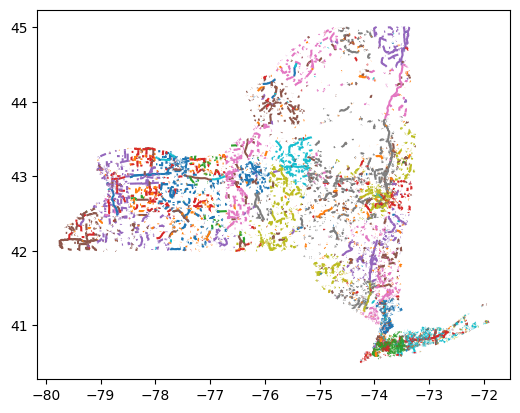

In [195]:
df_geo.plot(column="road_id")

In [187]:
fig = px.choropleth_mapbox(df_geo, geojson=df_geo.road_geom, locations=df_geo.index, color="road_id", 
                           mapbox_style="carto-positron", center={"lat": 40.689656, "lon": -74.045597}, 
                           height = 1000, width = 1600, zoom = 10)
fig.show()

KeyboardInterrupt: 

# OpenAq

In [57]:
query_aq ="""
select location_geom
from `bigquery-public-data.openaq.global_air_quality`
where country = 'US'
limit 10
"""
df_aq =  client.query(query_aq).to_dataframe()